# 인천공항 이용자수 분석 및 예측

- https://kosis.kr/search/search.do
- 출입국 항구/내외국인/성별 국제이동(연간) 2001 ~ 2023
- 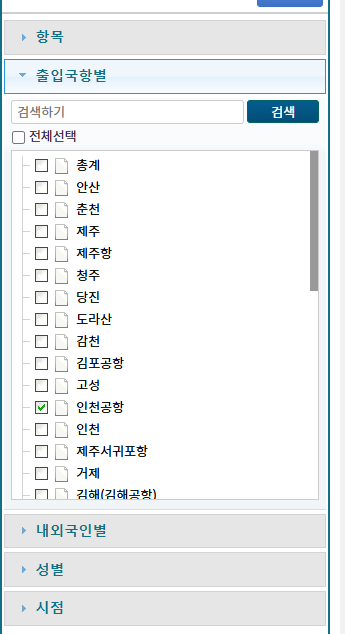 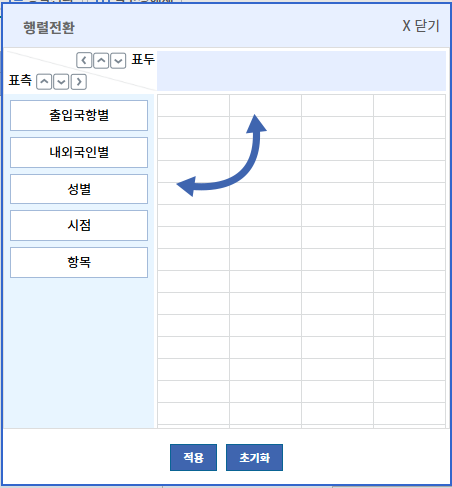

In [2]:
import pandas as pd
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



In [3]:
# csv파일 임포트

file_path = './ref/출입국항구내외국인성별국제이동연간_20250305.csv'
ori = pd.read_csv(file_path, encoding='EUC-KR')

ori

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [4]:
ex1_data = ori.copy()

ex1_data.columns = ['airport', 'type1', 'gender', 'year', 'type2', 'value']
# ex1_data.rename(columns={'',''}) 컬럼 하나 지정해서 변경 가능
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [5]:
# 필터제작

filter1 = ex1_data['type1'] == '외국인'

ex1_data[filter1].head()

,airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643


In [6]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')

ex1_data

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717
5,2006,996275
6,2007,1012415
7,2008,1080247
8,2009,1009778
9,2010,1019086


In [7]:
test_data = ori.copy()
test_data.columns = ['airport', 'type1', 'gender', 'year', 'type2', 'value']


In [8]:

ex2_data = test_data.loc[test_data['type1'] == '외국인'].loc[test_data['type2'] == '입국자']
ex2_data = ex2_data.groupby('year')['value'].sum().reset_index(name='total')

ex3_data = test_data.loc[test_data['type1'] == '외국인'].loc[test_data['type2'] == '출국자']
ex3_data = ex3_data.groupby('year')['value'].sum().reset_index(name='total')

ex4_data = test_data.loc[test_data['type1'] == '내국인'].loc[test_data['type2'] == '입국자']
ex4_data = ex4_data.groupby('year')['value'].sum().reset_index(name='total')

ex5_data = test_data.loc[test_data['type1'] == '내국인'].loc[test_data['type2'] == '출국자']
ex5_data = ex5_data.groupby('year')['value'].sum().reset_index(name='total')


In [9]:
# ex6_data = test_data.loc[test_data['type1'] == '외국인']
# ex6_data = ex6_data.groupby(['year', 'type2'])['value'].sum().reset_index(name='total')

In [10]:
path = 'C:\\Windows\\Fonts\\HanSantteutDotum-Regular.ttf'
font_name = fm.FontProperties(fname=path).get_name()
rc('font', family=font_name)



# ex2_data.plot(x='year', y='total', figsize=(13,7),title='2001 ~ 2023년 인천공항 입국 외국인 차트')
# plt.show()
# ex3_data.plot(x='year', y='total', figsize=(13,7),title='2001 ~ 2023년 인천공항 출국 외국인 차트')
# plt.show()
# ex4_data.plot(x='year', y='total', figsize=(13,7),title='2001 ~ 2023년 인천공항 입국 내국인 차트')
# plt.show()
# ex5_data.plot(x='year', y='total', figsize=(13,7),title='2001 ~ 2023년 인천공항 출국 내국인 차트')
# plt.show()

In [11]:
# ex6_data[ex6_data['type2'] == '출국자']['total'

# ex6_data['year']
# ex6_data[ex6_data['type2'] == '입국자']

In [12]:
# !pip install prophet

# !pip install --upgrade plotly

In [13]:
from prophet import Prophet
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다.

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
exf_data = ex1_data.copy()
exf_data['year'] = pd.to_datetime(exf_data['year'], format='%Y')
exf_data = exf_data.rename(columns={'year':'ds', 'total':'y'})
exf_data

,ds,y
0,2001-01-01,521210
1,2002-01-01,697631
2,2003-01-01,747272
3,2004-01-01,769912
4,2005-01-01,991717
5,2006-01-01,996275
6,2007-01-01,1012415
7,2008-01-01,1080247
8,2009-01-01,1009778
9,2010-01-01,1019086


In [15]:
m = Prophet()
m.fit(exf_data)

12:32:57 - cmdstanpy - INFO - Chain [1] start processing
12:32:57 - cmdstanpy - INFO - Chain [1] done processing


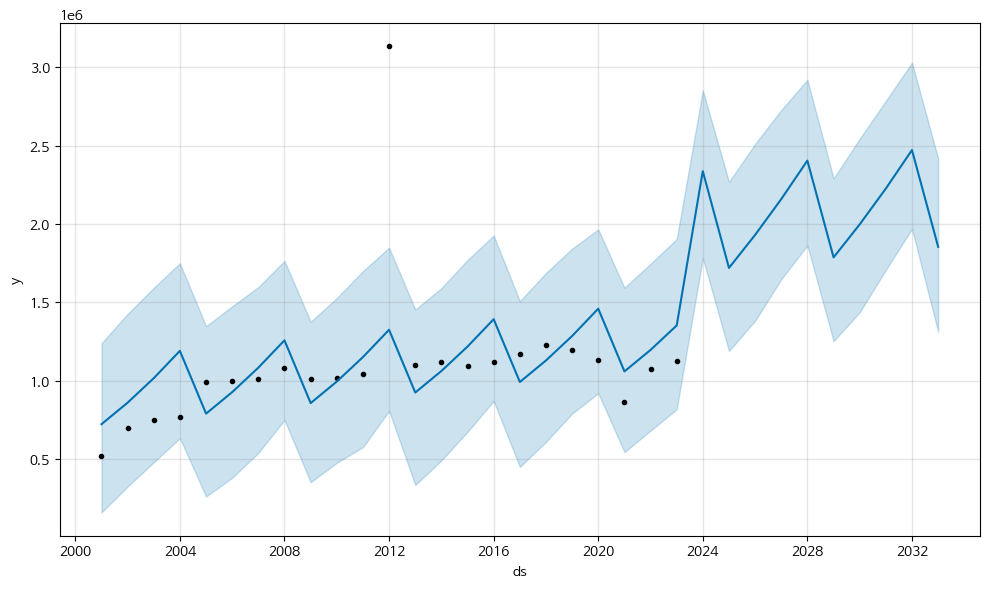

In [16]:
future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig('./chart/fut.png')
plt.show()

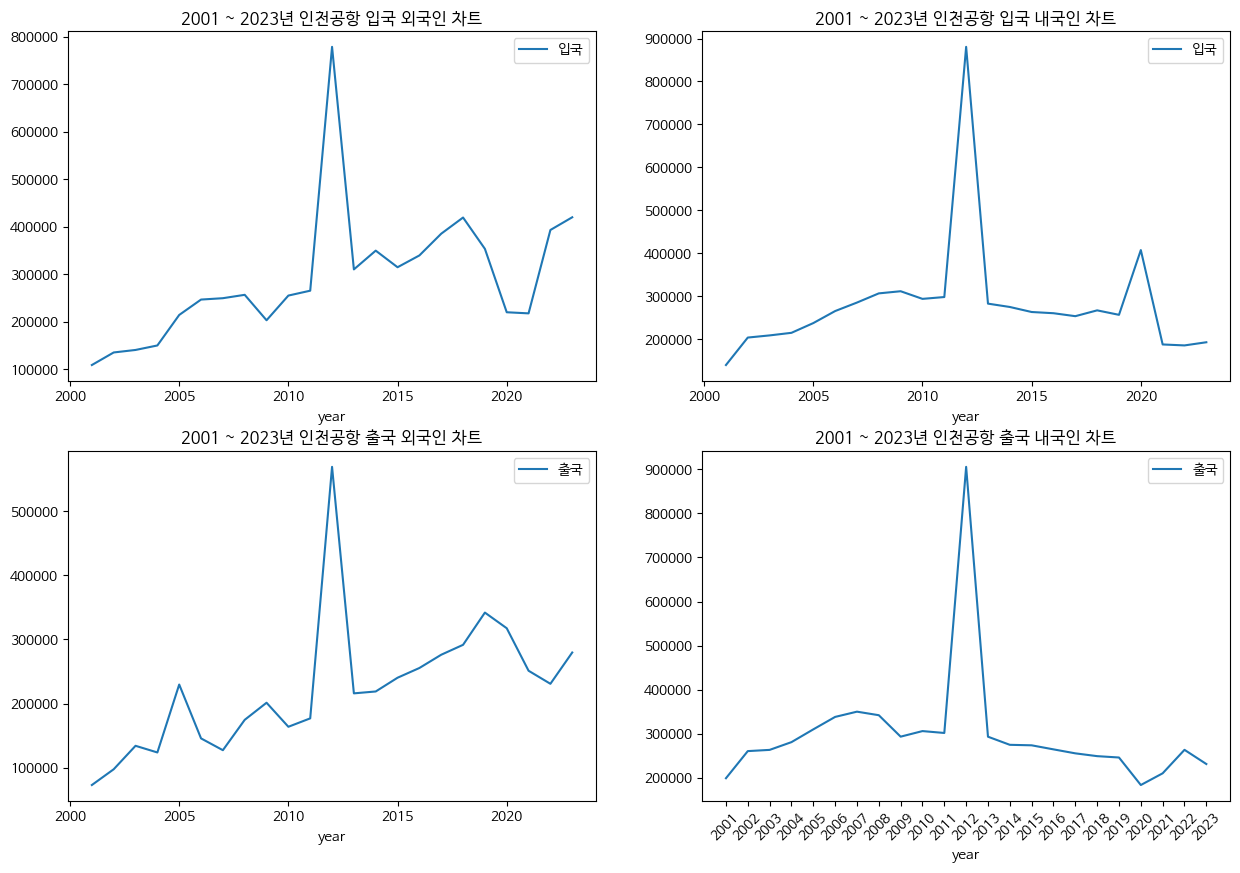

In [17]:


fig, ax = plt.subplots(2,2, figsize=(15,10))

ex2_data.plot(x='year', y='total', label ='입국', ax=ax[0][0])
ax[0][0].set_title('2001 ~ 2023년 인천공항 입국 외국인 차트')

ex3_data.plot(x='year', y='total', label ='출국', ax=ax[1][0])
ax[1][0].set_title('2001 ~ 2023년 인천공항 출국 외국인 차트')


ex4_data.plot(x='year', y='total', label ='입국', ax=ax[0][1])
ax[0][1].set_title('2001 ~ 2023년 인천공항 입국 내국인 차트')


ex5_data.plot(x='year', y='total', label ='출국', ax=ax[1][1])
ax[1][1].set_title('2001 ~ 2023년 인천공항 출국 내국인 차트')
# plt.xticks(range(len(ex2_data)))
plt.xticks(ex2_data['year'], rotation=45)


plt.show()

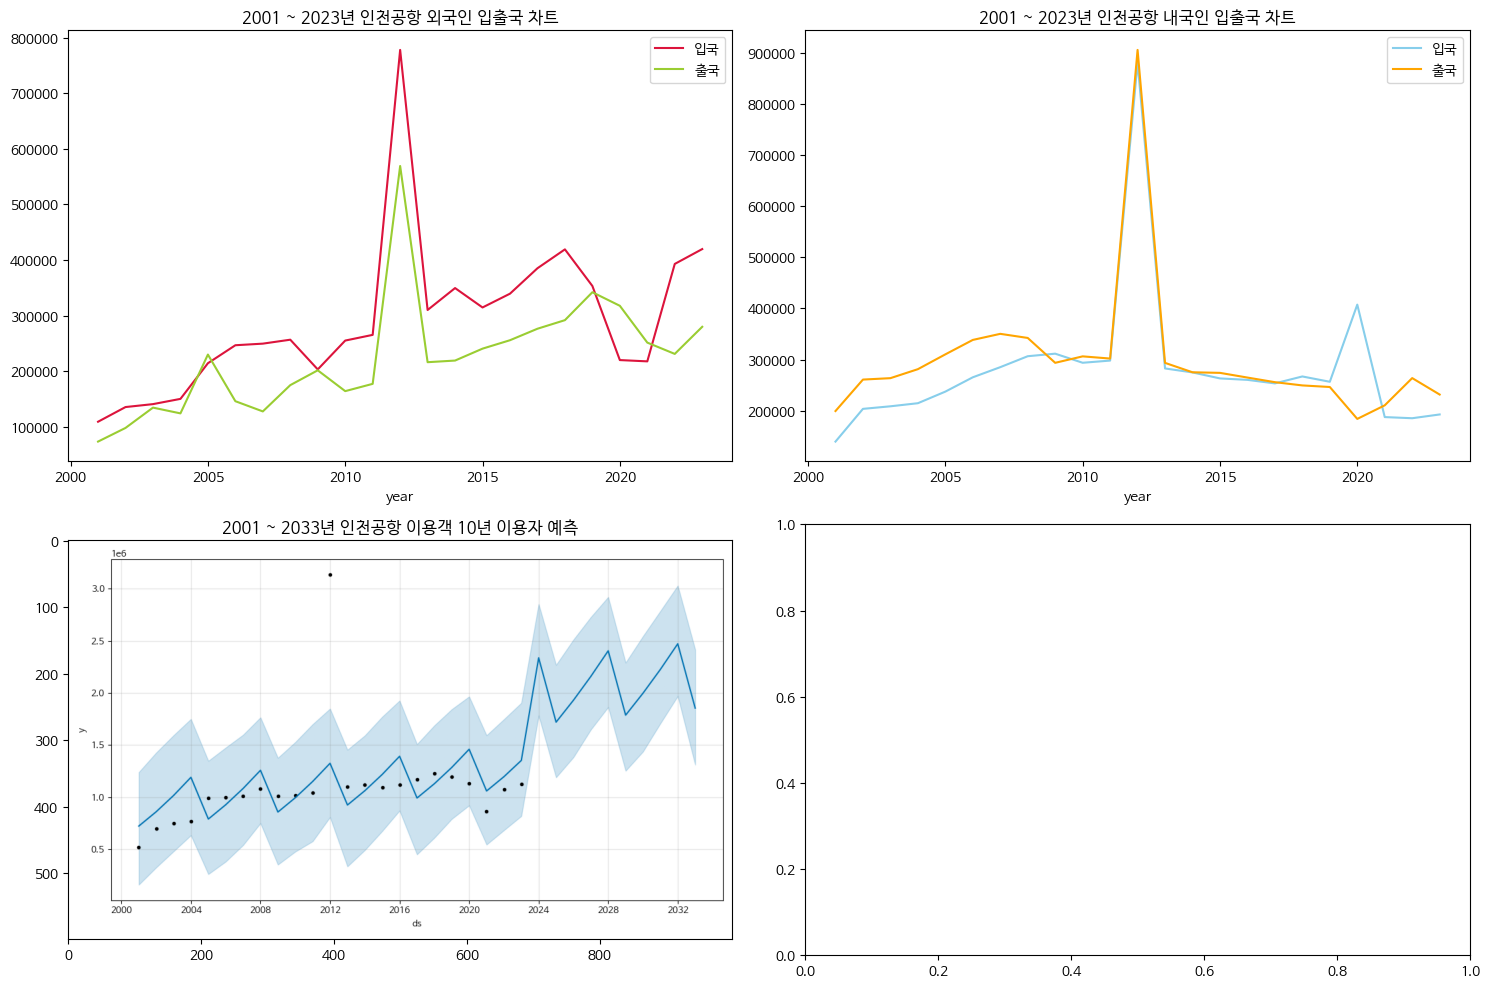

In [18]:
import matplotlib.image as mping

img = mping.imread('./chart/fut.png')

fig, ax = plt.subplots(2,2, figsize=(15,10))

ex2_data.plot(x='year', y='total', label ='입국', ax=ax[0][0], color='crimson')
ex3_data.plot(x='year', y='total', label ='출국', ax=ax[0][0], color='yellowgreen')
ax[0][0].set_title('2001 ~ 2023년 인천공항 외국인 입출국 차트')

ex4_data.plot(x='year', y='total', label ='입국', ax=ax[0][1], color='skyblue')
ex5_data.plot(x='year', y='total', label ='출국', ax=ax[0][1], color='orange')
ax[0][1].set_title('2001 ~ 2023년 인천공항 내국인 입출국 차트')

ax[1][0].set_title('2001 ~ 2033년 인천공항 이용객 10년 이용자 예측')
axins = fig.add_axes(ax[1,0])
axins.imshow(img)
plt.tight_layout()
plt.show()

In [19]:

gen_data = ori.copy()
gen_data.columns = ['airport', 'type1', 'gender', 'year', 'type2', 'value']

gen_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [34]:
gen1_data_m = gen_data.loc[(gen_data['type1'] == '내국인') & (gen_data['gender'] == '남자')]
gen1_data_m = gen1_data_m.groupby('year')['value'].sum().reset_index(name='total')

gen1_data_w = gen_data.loc[(gen_data['type1'] == '내국인') & (gen_data['gender'] == '여자')]
gen1_data_w = gen1_data_w.groupby('year')['value'].sum().reset_index(name='total')

gen2_data_m = gen_data.loc[(gen_data['type1'] == '외국인') & (gen_data['gender'] == '남자')]
gen2_data_m = gen2_data_m.groupby('year')['value'].sum().reset_index(name='total')

gen2_data_w = gen_data.loc[(gen_data['type1'] == '외국인') & (gen_data['gender'] == '여자')]
gen2_data_w = gen2_data_w.groupby('year')['value'].sum().reset_index(name='total')

gen1_data_m_i = gen_data.loc[(gen_data['type1'] == '내국인') & (gen_data['gender'] == '남자') & (gen_data['type2'] == '입국자')]
gen1_data_m_i = gen1_data_m_i.groupby('year')['value'].sum().reset_index(name='total')

gen1_data_m_o = gen_data.loc[(gen_data['type1'] == '내국인') & (gen_data['gender'] == '남자') & (gen_data['type2'] == '출국자')]
gen1_data_m_o = gen1_data_m_o.groupby('year')['value'].sum().reset_index(name='total')

gen2_data_w_i = gen_data.loc[(gen_data['type1'] == '내국인') & (gen_data['gender'] == '여자') & (gen_data['type2'] == '입국자')]
gen2_data_w_i = gen2_data_w_i.groupby('year')['value'].sum().reset_index(name='total')

gen2_data_w_o = gen_data.loc[(gen_data['type1'] == '내국인') & (gen_data['gender'] == '여자') & (gen_data['type2'] == '출국자')]
gen2_data_w_o = gen2_data_w_o.groupby('year')['value'].sum().reset_index(name='total')

In [35]:
gen2_data_m_o

,year,total
0,2001,103115
1,2002,136808
2,2003,138674
3,2004,147222
4,2005,161084
5,2006,174412
6,2007,178329
7,2008,172990
8,2009,148251
9,2010,156301


In [41]:
file_path2 = './ref/출입국_김포.csv'

subd = pd.read_csv(file_path2, encoding='EUC-KR')

subd.columns = ['airport', 'type1', 'gender', 'year', 'type2', 'value']

subd

,airport,type1,gender,year,type2,value
0,김포공항,내국인,남자,2001,입국자,24341
1,김포공항,내국인,남자,2001,출국자,34558
2,김포공항,내국인,남자,2002,입국자,3
3,김포공항,내국인,남자,2002,출국자,4
4,김포공항,내국인,남자,2003,입국자,28
...,...,...,...,...,...,...
179,김포공항,외국인,여자,2021,출국자,5
180,김포공항,외국인,여자,2022,입국자,361
181,김포공항,외국인,여자,2022,출국자,342
182,김포공항,외국인,여자,2023,입국자,3361


In [42]:
gim1_data_o = subd.loc[(subd['type1'] == '내국인') & (subd['type2'] == '출국자')]
gim1_data_o = gim1_data_o.groupby('year')['value'].sum().reset_index(name='total')

gim1_data_i = subd.loc[(subd['type1'] == '내국인') & (subd['type2'] == '입국자')]
gim1_data_i = gim1_data_i.groupby('year')['value'].sum().reset_index(name='total')

gim2_data_o = subd.loc[(subd['type1'] == '외국인') & (subd['type2'] == '출국자')]
gim2_data_o = gim2_data_o.groupby('year')['value'].sum().reset_index(name='total')

gim2_data_i = subd.loc[(subd['type1'] == '외국인') & (subd['type2'] == '입국자')]
gim2_data_i = gim2_data_i.groupby('year')['value'].sum().reset_index(name='total')

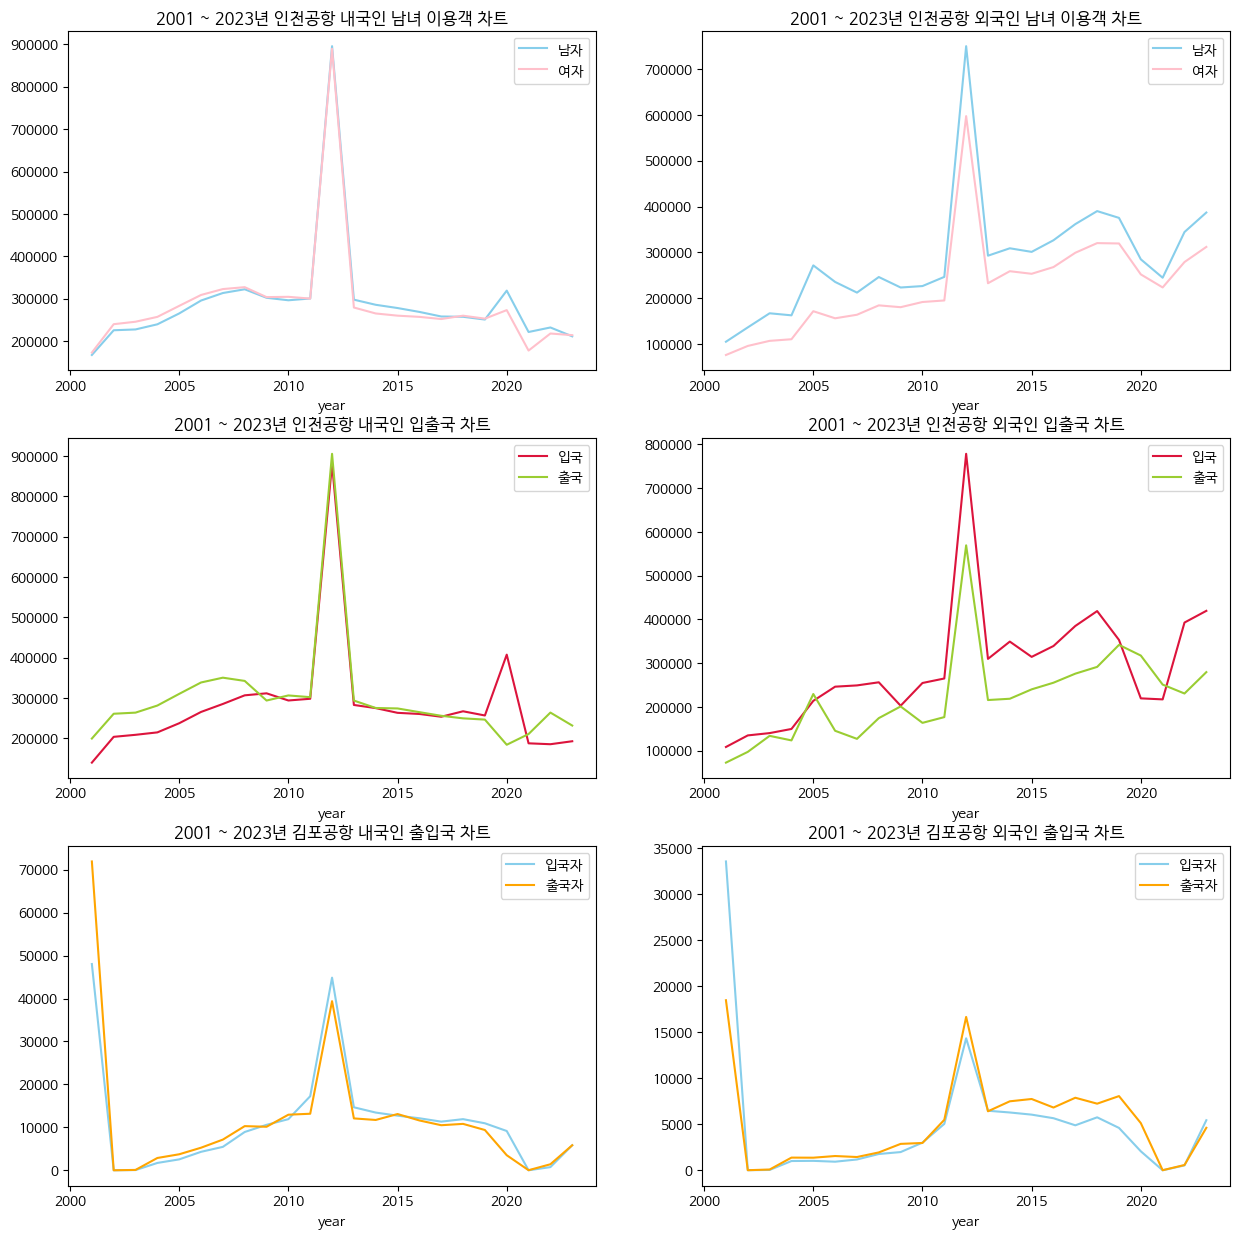

In [47]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

gen1_data_m.plot(x='year', y='total', label ='남자', ax=ax[0][0], color='skyblue')
gen1_data_w.plot(x='year', y='total', label ='여자', ax=ax[0][0], color='pink')
ax[0][0].set_title('2001 ~ 2023년 인천공항 내국인 남녀 이용객 차트')

gen2_data_m.plot(x='year', y='total', label ='남자', ax=ax[0][1], color='skyblue')
gen2_data_w.plot(x='year', y='total', label ='여자', ax=ax[0][1], color='pink')
ax[0][1].set_title('2001 ~ 2023년 인천공항 외국인 남녀 이용객 차트')

# gen1_data_m_i.plot(x='year', y='total', label ='입국자', ax=ax[1][0], color='skyblue')
# gen1_data_m_o.plot(x='year', y='total', label ='출국자', ax=ax[1][0], color='orange')
# ax[1][0].set_title('2001 ~ 2023년 인천공항 내국인 남자 출입국 차트')

# gen2_data_w_i.plot(x='year', y='total', label ='입국자', ax=ax[1][1], color='skyblue')
# gen2_data_w_o.plot(x='year', y='total', label ='출국자', ax=ax[1][1], color='orange')
# ax[1][1].set_title('2001 ~ 2023년 인천공항 내국인 여자 출입국 차트')

ex4_data.plot(x='year', y='total', label ='입국', ax=ax[1][0], color='crimson')
ex5_data.plot(x='year', y='total', label ='출국', ax=ax[1][0], color='yellowgreen')
ax[1][0].set_title('2001 ~ 2023년 인천공항 내국인 입출국 차트')

ex2_data.plot(x='year', y='total', label ='입국', ax=ax[1][1], color='crimson')
ex3_data.plot(x='year', y='total', label ='출국', ax=ax[1][1], color='yellowgreen')
ax[1][1].set_title('2001 ~ 2023년 인천공항 외국인 입출국 차트')


gim1_data_i.plot(x='year', y='total', label ='입국자', ax=ax[2][0], color='skyblue')
gim1_data_o.plot(x='year', y='total', label ='출국자', ax=ax[2][0], color='orange')
ax[2][0].set_title('2001 ~ 2023년 김포공항 내국인 출입국 차트')

gim2_data_i.plot(x='year', y='total', label ='입국자', ax=ax[2][1], color='skyblue')
gim2_data_o.plot(x='year', y='total', label ='출국자', ax=ax[2][1], color='orange')
ax[2][1].set_title('2001 ~ 2023년 김포공항 외국인 출입국 차트')



plt.show()

- 인천공항의 내국인의 경우 남녀 모두 비슷한 수의 인원이 이용하며, 코로나 시기 약간의 차이가 벌어졌으나 최근 다시 동일해졌다.
- 반면 외국인의 경우 남자 이용객의 수가 많은편이며, 코로나 시기 감소한 이용객이 다시 복구되었다.

- 내국인의 경우 코로나 시기 입국자 수가 매우 높은편이나, 외국인의 경우 출국이 소폭 높은편이다.
  해당시기 세계적인 공항 이용 제한의 영향으로 보인다.

- 2001년 인천공항이 개항하며 김포공항의 국제선 기능을 이어받았다고 한다.
- 실제 2001년 높았던 이용객이 2002, 2003년 사라졌음이 보이며, 2004년부터 이용객이 늘어나는것이 나타난다.

- 공통적으로 모든 자료에서 2012년 수치가 급등하는 것이 보인다.
- 한국 공항 공사의 항공 통계에 따르면 이는 자료의 오류로 보여진다.